In [1]:
import json
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Path to the outputs directory
outputs_dir = 'outputs/'

# Get all JSON files in the directory
json_files = [f for f in os.listdir(outputs_dir) if f.endswith('.json')]

# Check if we have exactly 3 files
if len(json_files) < 3:
    print(f"Warning: Found {len(json_files)} JSON files instead of 3")

# Read performance data from each file
model_performances = []
for json_file in json_files:
    with open(os.path.join(outputs_dir, json_file), 'r') as f:
        data = json.load(f)
        # Assuming the model name is in the filename
        model_name = os.path.splitext(json_file)[0]
        data['model_name'] = model_name
        model_performances.append(data)

# Convert to DataFrame for easier visualization
df = pd.DataFrame(model_performances)

# Visualize the results
plt.figure(figsize=(12, 8))

# Create a bar plot for accuracy or any common metric
if 'accuracy' in df.columns:
    plt.subplot(2, 2, 1)
    sns.barplot(x='model_name', y='accuracy', data=df)
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)

# Create another plot for a different metric if available
common_metrics = ['precision', 'recall', 'f1_score', 'loss']
for i, metric in enumerate(common_metrics):
    if metric in df.columns and i < 3:  # Only plot 3 additional metrics
        plt.subplot(2, 2, i+2)
        sns.barplot(x='model_name', y=metric, data=df)
        plt.title(f'Model {metric.replace("_", " ").title()} Comparison')
        plt.xticks(rotation=45)

# Display all metrics in a table
print("Model Performance Summary:")
print(df)

plt.tight_layout()
plt.show()


Model Performance Summary:
                                     accuracies_top1  \
0  [[1, 0.3566], [2, 0.4292], [3, 0.5091], [4, 0....   
1  [[1, 0.5022], [2, 0.6179], [3, 0.6462], [4, 0....   
2  [[1, 0.5116], [2, 0.6084], [3, 0.6474], [4, 0....   

                                     accuracies_top5  \
0  [[1, 0.8573], [2, 0.9119], [3, 0.9338], [4, 0....   
1  [[1, 0.9318], [2, 0.9623], [3, 0.9672], [4, 0....   
2  [[1, 0.9343], [2, 0.9599], [3, 0.9681], [4, 0....   

                                              losses       model_name  
0  [[1, 0.03564670007228851], [2, 0.0331784908533...  history_fedavgm  
1  [[1, 0.02271204309463501], [2, 0.0172431346595...   history_fedavg  
2  [[1, 0.02279267013669014], [2, 0.0176445990562...  history_fedprox  


<Figure size 1200x800 with 0 Axes>

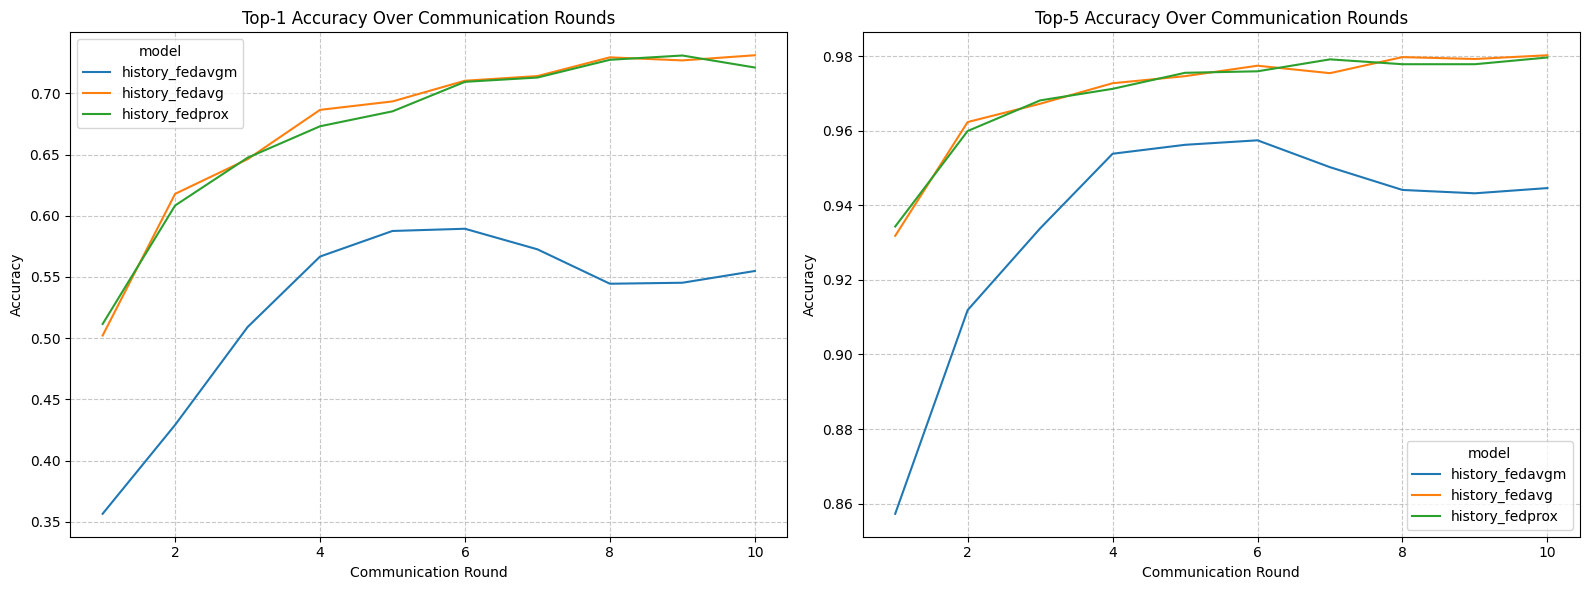

In [2]:
# Process the data to make it suitable for plotting
processed_data = []

for index, row in df.iterrows():
    model = row['model_name']
    
    # Process top-1 accuracy
    for round_acc in row['accuracies_top1']:
        round_num = round_acc[0]
        acc_value = round_acc[1]
        processed_data.append({
            'model': model,
            'round': round_num,
            'accuracy': acc_value,
            'type': 'Top-1'
        })
    
    # Process top-5 accuracy
    for round_acc in row['accuracies_top5']:
        round_num = round_acc[0]
        acc_value = round_acc[1]
        processed_data.append({
            'model': model,
            'round': round_num,
            'accuracy': acc_value,
            'type': 'Top-5'
        })

# Convert to DataFrame
acc_df = pd.DataFrame(processed_data)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Top-1 accuracy
sns.lineplot(x='round', y='accuracy', hue='model', data=acc_df[acc_df['type'] == 'Top-1'], 
             markers=True, dashes=False, ax=ax1)
ax1.set_title('Top-1 Accuracy Over Communication Rounds')
ax1.set_xlabel('Communication Round')
ax1.set_ylabel('Accuracy')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Top-5 accuracy
sns.lineplot(x='round', y='accuracy', hue='model', data=acc_df[acc_df['type'] == 'Top-5'], 
             markers=True, dashes=False, ax=ax2)
ax2.set_title('Top-5 Accuracy Over Communication Rounds')
ax2.set_xlabel('Communication Round')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

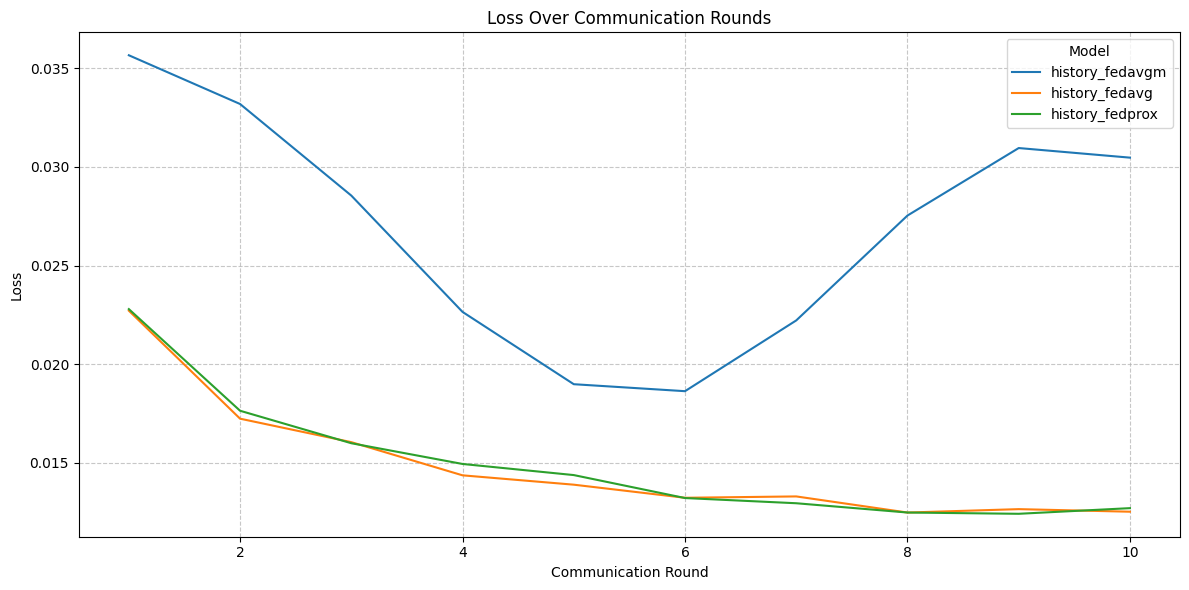

In [3]:
# Process the loss data to make it suitable for plotting
loss_data = []

for index, row in df.iterrows():
    model = row['model_name']
    
    # Process loss values
    for round_loss in row['losses']:
        round_num = round_loss[0]
        loss_value = round_loss[1]
        loss_data.append({
            'model': model,
            'round': round_num,
            'loss': loss_value
        })

# Convert to DataFrame
loss_df = pd.DataFrame(loss_data)

# Create a figure for loss visualization
plt.figure(figsize=(12, 6))

# Plot loss over communication rounds
sns.lineplot(x='round', y='loss', hue='model', data=loss_df, 
             markers=True, dashes=False)
plt.title('Loss Over Communication Rounds')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Model')

plt.tight_layout()
plt.show()